In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re

def chars_convert(texts1):

  cn = [one for one in texts1]

  return str(cn)

In [ ]:
# importing packages
import pandas as pd
  
# load json file using pandas
original_df = pd.read_json('/content/drive/MyDrive/Thesis/TNews/train.json', lines=True)
original_df['sentences'] = original_df['sentence'].apply(lambda x: chars_convert(x))

original_df.drop_duplicates(subset='sentences', keep='first')


from io import StringIO
col = ['label_desc', 'sentences']
original_df = original_df[col]
original_df = original_df[pd.notnull(original_df['sentences'])]
original_df.columns = ['label_desc', 'sentences']
original_df['category_id'] = original_df['label_desc'].factorize()[0]
category_id_df = original_df[['label_desc', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label_desc']].values)

# shuffle the dataframe randomly
original_df.sample(frac=1, random_state=2)

#Check if there's any null elements
col_mask=original_df.isnull().any(axis=0) 
row_mask=original_df.isnull().any(axis=1)

original_df.loc[row_mask,col_mask]


df = original_df[0:10000]

vali_df = original_df[10000:15000]

test_df = original_df[15000:25000]



original_df.groupby('label_desc').size()

# vali_test_df.groupby('label_desc').size()

label_desc
news_agriculture      2886
news_car              4118
news_culture          4081
news_edu              3437
news_entertainment    4976
news_finance          5200
news_game             3390
news_house            2107
news_military         3632
news_sports           3991
news_stock             257
news_story            1111
news_tech             5955
news_travel           3368
news_world            4851
dtype: int64

In [ ]:
data = df.groupby('label_desc').head(500)
vali_data = vali_df.groupby('label_desc').head(100)
test_data = test_df.groupby('label_desc').head(500)
print(data.groupby('label_desc').size())
print(vali_data.groupby('label_desc').size())
print(test_data.groupby('label_desc').size())

label_desc
news_agriculture      500
news_car              500
news_culture          500
news_edu              500
news_entertainment    500
news_finance          500
news_game             500
news_house            421
news_military         500
news_sports           500
news_stock             46
news_story            220
news_tech             500
news_travel           500
news_world            500
dtype: int64
label_desc
news_agriculture      100
news_car              100
news_culture          100
news_edu              100
news_entertainment    100
news_finance          100
news_game             100
news_house            100
news_military         100
news_sports           100
news_stock             27
news_story             96
news_tech             100
news_travel           100
news_world            100
dtype: int64
label_desc
news_agriculture      500
news_car              500
news_culture          500
news_edu              500
news_entertainment    500
news_finance          500
news_

In [ ]:
# target = data['label_desc'].isin(['news_agriculture', 'news_car', 'news_culture', 'news_edu', 'news_entertainment', 'news_finance', 'news_game', 'news_house', 'news_military', 'news_sports', 'news_tech', 'news_travel', 'news_world'])
target = data['label_desc'].isin(['news_entertainment', 'news_finance', 'news_tech', 'news_world'])
df = data[target]

vali_target = vali_data['label_desc'].isin(['news_entertainment', 'news_finance', 'news_tech', 'news_world',])
vali_df = vali_data[vali_target]

test_target = test_data['label_desc'].isin(['news_entertainment', 'news_finance', 'news_tech', 'news_world',])
test_df = test_data[test_target]


news_finance          100
news_entertainment    100
news_world            100
news_tech             100
Name: label_desc, dtype: int64


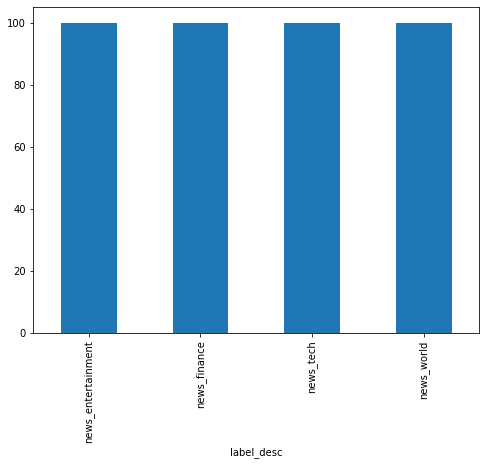

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
vali_df.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(vali_df['label_desc'].value_counts())
plt.show()

In [ ]:
# split vali and test set out of the whole size of data, using the left items as the whole training set for the last experiment

tmp =  original_df['label_desc'].isin(['news_entertainment', 'news_finance', 'news_tech', 'news_world'])
new_original_df = original_df[tmp]

print(len(new_original_df))

vali_test_df = pd.concat([vali_df, test_df])

whole_training_df_0 = pd.concat([vali_test_df, new_original_df]).drop_duplicates(keep=False) # keep the 'news_entertainment', 'news_finance', 'news_tech', 'news_world' posts which are in the training.json but are not in the vali_test_df as the big training set for comparison with the small training sets

whole_training_df_0.groupby('label_desc').size()
print(whole_training_df_0['label_desc'].value_counts())
print(len(whole_training_df_0))

whole_training_df = whole_training_df_0.groupby('label_desc').apply(lambda x: x.sample(random_state=1, n=3000)).reset_index(drop=True)
print(whole_training_df['label_desc'].value_counts())


20982
news_tech             4763
news_finance          4307
news_entertainment    4233
news_world            3676
Name: label_desc, dtype: int64
16979
news_entertainment    3000
news_finance          3000
news_tech             3000
news_world            3000
Name: label_desc, dtype: int64


news_finance          600
news_entertainment    600
news_world            600
news_tech             600
Name: label_desc, dtype: int64


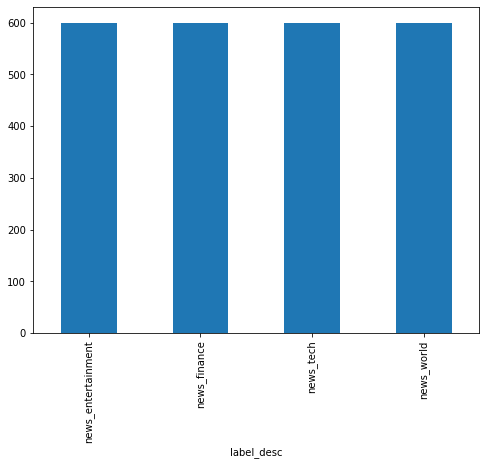

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
vali_test_df.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(vali_test_df['label_desc'].value_counts())
plt.show()

news_finance          100
news_entertainment    100
news_world            100
news_tech             100
Name: label_desc, dtype: int64


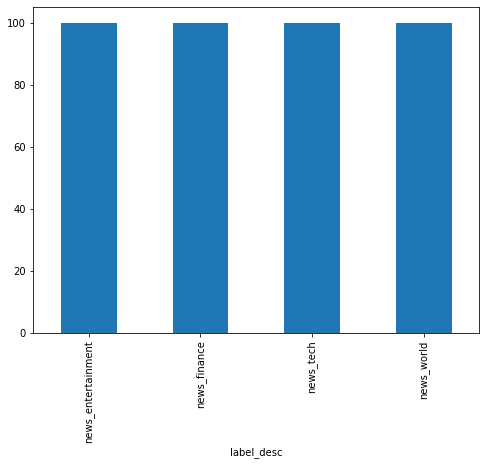

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
vali_df.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(vali_df['label_desc'].value_counts())
plt.show()

news_tech             500
news_world            500
news_finance          500
news_entertainment    500
Name: label_desc, dtype: int64


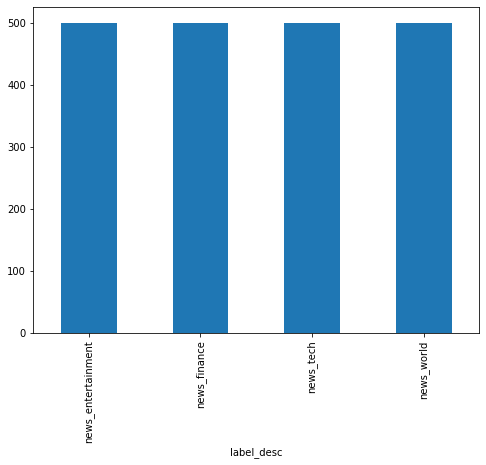

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
test_df.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(test_df['label_desc'].value_counts())
plt.show()

In [ ]:
### Defining the model and tuning process ###

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support, accuracy_score,recall_score,precision_score,f1_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid

def SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test):

    clf = LinearSVC()

    best_score = 0
    # defining parameter range
    grid = {
            'C': [0.001, 0.1, 1, 10, 25, 50, 100], 
            
        }
    paramGrid = ParameterGrid(grid)
    for params in paramGrid:
            clf.set_params(**params)
            clf.fit(X_train, y_train)
            # PREDICT VALUE BASED ON UPDATED PARAMETERS
            y_vali_result = clf.predict(vali_X)
            f1 = f1_score(vali_Y,y_vali_result,average='macro')
            if f1 > best_score:
                  best_score = f1
                  best_grid = params

    print("Grid:", best_grid)
    # # NEW MODEL EVALUATION METRICS 
    t = LinearSVC()
    model = t.set_params(**best_grid)
    model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    # print(type(y_pred_test))
    # print(type(y_test))
    print("####################################")
    print("By using SVC model, the evaluation metrics with the best parameter are:")
    accuracy = accuracy_score(y_test,y_pred_test)
    precision = precision_score(y_test,y_pred_test,average='macro')
    recall = recall_score(y_test,y_pred_test,average='macro')
    f1 = f1_score(y_test,y_pred_test,average='macro')
    print('Best parameters: ' + str(model))
    print('Accuracy Score : ' + str(accuracy))
    print('Precision Score : ' + str(precision))
    print('Recall Score : ' + str(recall))
    print('F1 Score : ' + str(f1))
    return f1



In [ ]:
df_10 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=10)).reset_index(drop=True)
df_20 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=20)).reset_index(drop=True)
df_30 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=30)).reset_index(drop=True)
df_40 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=40)).reset_index(drop=True)
df_50 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=50)).reset_index(drop=True)
df_60 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=60)).reset_index(drop=True)
df_70 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=70)).reset_index(drop=True)
df_80 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=80)).reset_index(drop=True)
df_90 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=90)).reset_index(drop=True)
df_100 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=100)).reset_index(drop=True)
df_200 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=200)).reset_index(drop=True)
df_300 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=300)).reset_index(drop=True)
df_400 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=400)).reset_index(drop=True)
df_500 = df.groupby('label_desc').apply(lambda x: x.sample(random_state=0, n=500)).reset_index(drop=True) # Use all samples from training set



In [ ]:
########################### Data Size = 10 ##################################


news_entertainment    10
news_finance          10
news_tech             10
news_world            10
Name: label_desc, dtype: int64


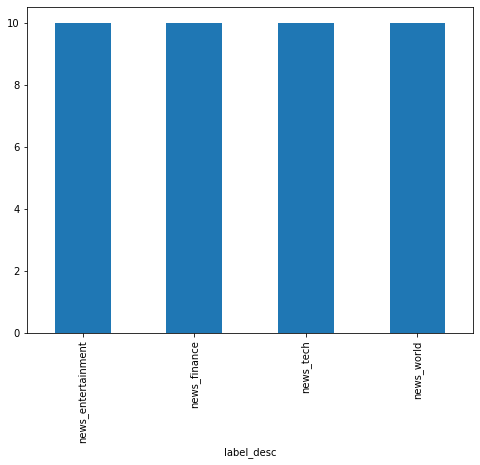

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_10.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_10['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_10, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(2440, 2556)

In [ ]:
X_train = features[:40]
vali_X = features[40:440]
y_train = labels[:40]
vali_Y = labels[40:440]
X_test = features[440:]
y_test = labels[440:]

f1_10 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


Grid: {'C': 1}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=1)
Accuracy Score : 0.399
Precision Score : 0.3947255156502338
Recall Score : 0.399
F1 Score : 0.3932136078502013


In [ ]:
########################### Data Size = 20 ##################################

news_entertainment    20
news_finance          20
news_tech             20
news_world            20
Name: label_desc, dtype: int64


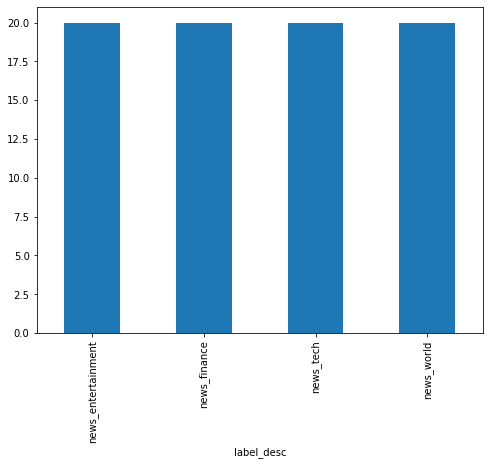

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_20.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_20['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_20, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(2480, 2587)

In [ ]:
X_train = features[:80]
vali_X = features[80:480] # altogether 400 posts in validation set
y_train = labels[:80]
vali_Y = labels[80:480]
X_test = features[480:]
y_test = labels[480:]
# print(type(X_test))

f1_20 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


Grid: {'C': 1}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=1)
Accuracy Score : 0.461
Precision Score : 0.46012351459924594
Recall Score : 0.461
F1 Score : 0.4605072859043089


In [ ]:
########################### Data Size = 30 ##################################


news_entertainment    30
news_finance          30
news_tech             30
news_world            30
Name: label_desc, dtype: int64


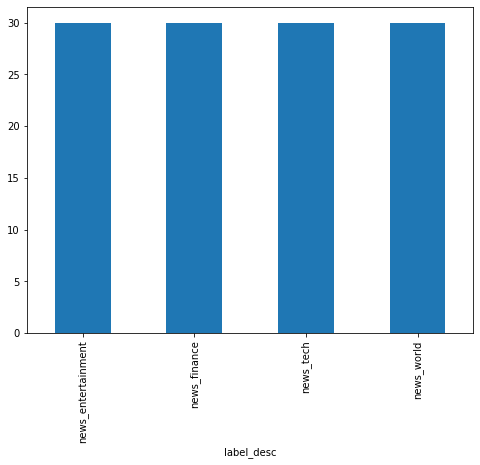

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_30.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_30['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_30, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(2520, 2616)

In [ ]:
X_train = features[:120]
vali_X = features[120:520] # altogether 400 posts in validation set
y_train = labels[:120]
vali_Y = labels[120:520]
X_test = features[520:]
y_test = labels[520:]
# print(type(X_test))

f1_30 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


Grid: {'C': 0.1}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=0.1)
Accuracy Score : 0.504
Precision Score : 0.5007989215759681
Recall Score : 0.504
F1 Score : 0.5009999181665004


In [ ]:
########################### Data Size = 40 ##################################



news_entertainment    40
news_finance          40
news_tech             40
news_world            40
Name: label_desc, dtype: int64


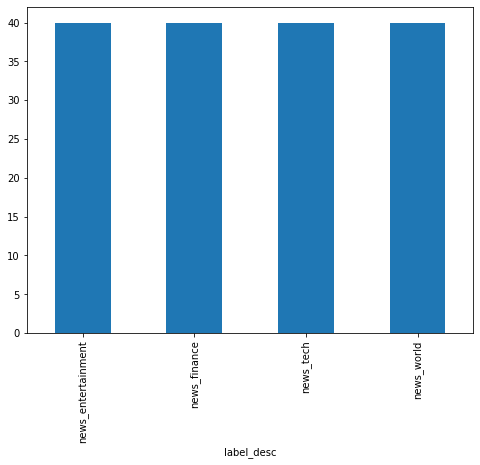

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_40.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_40['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_40, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(2560, 2645)

In [ ]:
X_train = features[:160]
vali_X = features[160:560] # altogether 400 posts in validation set
y_train = labels[:160]
vali_Y = labels[160:560]
X_test = features[560:]
y_test = labels[560:]
# print(type(X_test))

f1_40 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


Grid: {'C': 0.1}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=0.1)
Accuracy Score : 0.5325
Precision Score : 0.5303328461072879
Recall Score : 0.5325
F1 Score : 0.5307851381800504


In [ ]:
########################### Data Size = 50 ##################################

news_entertainment    50
news_finance          50
news_tech             50
news_world            50
Name: label_desc, dtype: int64


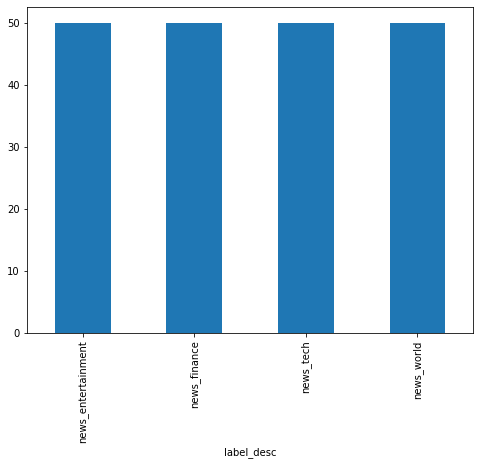

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_50.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_50['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_50, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(2600, 2688)

In [ ]:
X_train = features[:200]
vali_X = features[200:600] # altogether 400 posts in validation set
y_train = labels[:200]
vali_Y = labels[200:600]
X_test = features[600:]
y_test = labels[600:]
# print(type(X_test))

f1_50 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


Grid: {'C': 0.1}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=0.1)
Accuracy Score : 0.5505
Precision Score : 0.5476476921415979
Recall Score : 0.5505
F1 Score : 0.5484413772103358


In [ ]:
########################### Data Size = 60 ##################################


news_entertainment    60
news_finance          60
news_tech             60
news_world            60
Name: label_desc, dtype: int64


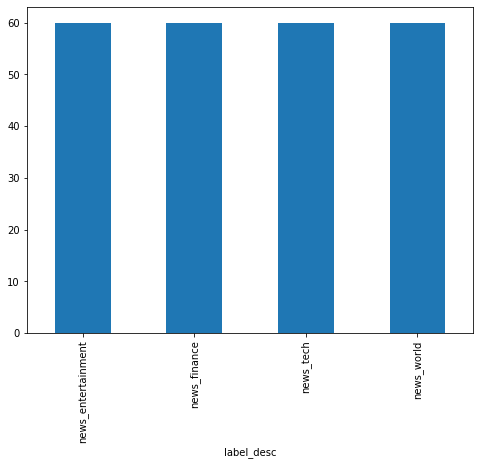

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_60.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_60['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_60, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(2640, 2720)

In [ ]:
X_train = features[:240]
vali_X = features[240:640] # altogether 400 posts in validation set
y_train = labels[:240]
vali_Y = labels[240:640]
X_test = features[640:]
y_test = labels[640:]
# print(type(X_test))

f1_60 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


Grid: {'C': 0.1}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=0.1)
Accuracy Score : 0.5635
Precision Score : 0.5602888396615808
Recall Score : 0.5635
F1 Score : 0.5609997473987277


In [ ]:
########################### Data Size = 70 ##################################


news_entertainment    70
news_finance          70
news_tech             70
news_world            70
Name: label_desc, dtype: int64


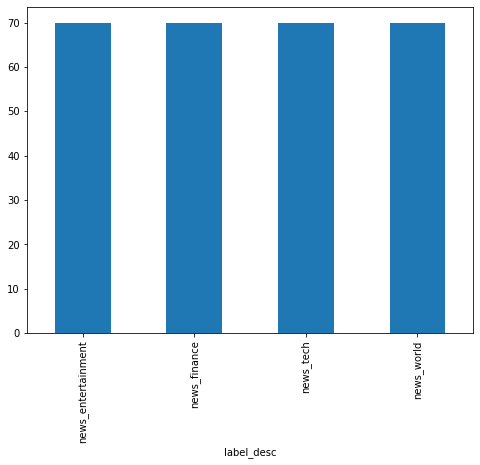

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_70.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_70['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_70, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(2680, 2755)

In [ ]:
X_train = features[:280]
vali_X = features[280:680] # altogether 400 posts in validation set
y_train = labels[:280]
vali_Y = labels[280:680]
X_test = features[680:]
y_test = labels[680:]
# print(type(X_test))

f1_70 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


Grid: {'C': 0.001}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=0.001)
Accuracy Score : 0.5745
Precision Score : 0.5736795264904043
Recall Score : 0.5745
F1 Score : 0.5725537822983473


In [ ]:
########################### Data Size = 80 ##################################

news_entertainment    80
news_finance          80
news_tech             80
news_world            80
Name: label_desc, dtype: int64


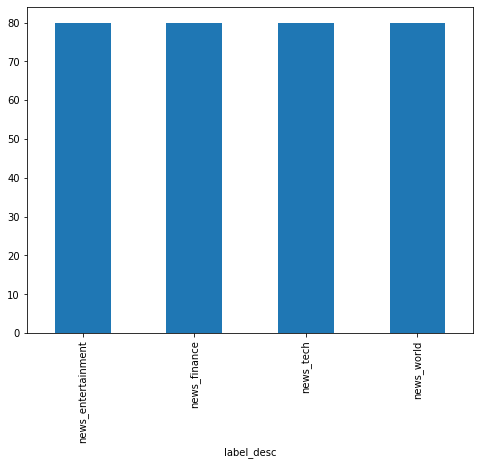

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_80.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_80['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_80, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(2720, 2799)

In [ ]:
X_train = features[:320]
vali_X = features[320:720] # altogether 400 posts in validation set
y_train = labels[:320]
vali_Y = labels[320:720]
X_test = features[720:]
y_test = labels[720:]
# print(type(X_test))

f1_80 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


Grid: {'C': 0.001}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=0.001)
Accuracy Score : 0.572
Precision Score : 0.5716220749891942
Recall Score : 0.572
F1 Score : 0.5704957946140125


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
########################### Data Size = 90 ##################################


news_entertainment    90
news_finance          90
news_tech             90
news_world            90
Name: label_desc, dtype: int64


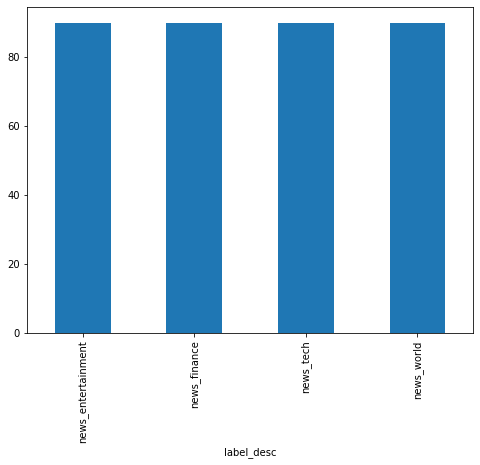

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_90.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_90['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_90, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(2760, 2826)

In [ ]:
X_train = features[:360]
vali_X = features[360:760] # altogether 500 posts in validation set
y_train = labels[:360]
vali_Y = labels[360:760]
X_test = features[760:]
y_test = labels[760:]
# print(type(X_test))

f1_90 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


Grid: {'C': 0.001}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=0.001)
Accuracy Score : 0.582
Precision Score : 0.5806859633612795
Recall Score : 0.582
F1 Score : 0.5793864854163273


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
########################### Data Size = 100 ##################################


news_entertainment    100
news_finance          100
news_tech             100
news_world            100
Name: label_desc, dtype: int64


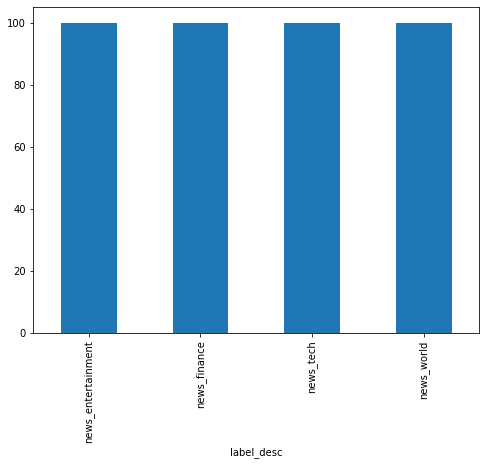

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_100.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_100['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_100, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(2800, 2861)

In [ ]:
X_train = features[:400]
vali_X = features[400:800] # altogether 500 posts in validation set
y_train = labels[:400]
vali_Y = labels[400:800]
X_test = features[800:]
y_test = labels[800:]
# print(type(X_test))

f1_100 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


Grid: {'C': 0.001}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=0.001)
Accuracy Score : 0.5855
Precision Score : 0.5840069790158052
Recall Score : 0.5855
F1 Score : 0.5831930780296859


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
########################### Data Size = 200 ##################################


news_entertainment    200
news_finance          200
news_tech             200
news_world            200
Name: label_desc, dtype: int64


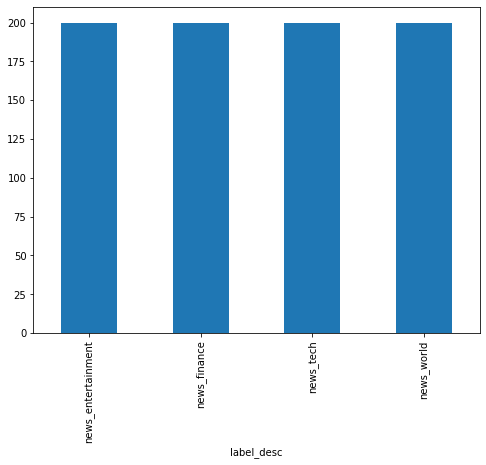

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_200.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_200['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_200, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(3200, 3196)

In [ ]:
X_train = features[:800]
vali_X = features[800:1200] # altogether 400 posts in validation set
y_train = labels[:800]
vali_Y = labels[800:1200]
X_test = features[1200:]
y_test = labels[1200:]
# print(type(X_test))

f1_200 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


Grid: {'C': 0.1}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=0.1)
Accuracy Score : 0.6225
Precision Score : 0.6197185896060247
Recall Score : 0.6225
F1 Score : 0.6192853035814114


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
########################### Data Size = 300 ##################################

news_entertainment    300
news_finance          300
news_tech             300
news_world            300
Name: label_desc, dtype: int64


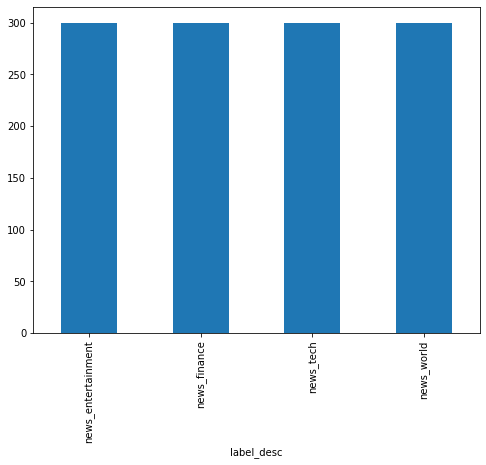

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_300.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_300['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_300, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(3600, 3528)

In [ ]:
X_train = features[:1200]
vali_X = features[1200:1600] # altogether 400 posts in validation set
y_train = labels[:1200]
vali_Y = labels[1200:1600]
X_test = features[1600:]
y_test = labels[1600:]
# print(type(X_test))

f1_300 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Grid: {'C': 0.1}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=0.1)
Accuracy Score : 0.639
Precision Score : 0.6371547116411277
Recall Score : 0.639
F1 Score : 0.6365541227539423


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
########################### Data Size = 400 ##################################

news_entertainment    400
news_finance          400
news_tech             400
news_world            400
Name: label_desc, dtype: int64


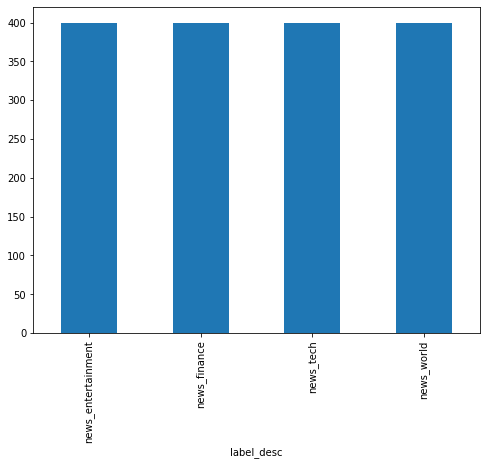

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_400.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_400['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_400, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(4000, 3838)

In [ ]:
X_train = features[:1600]
vali_X = features[1600:2000] # altogether 400 posts in validation set
y_train = labels[:1600]
vali_Y = labels[1600:2000]
X_test = features[2000:]
y_test = labels[2000:]
# print(type(X_test))

f1_400 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Grid: {'C': 0.1}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=0.1)
Accuracy Score : 0.649
Precision Score : 0.6477904691794316
Recall Score : 0.649
F1 Score : 0.6470258555362713


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
########################### Data Size = 500 ##################################

news_entertainment    500
news_finance          500
news_tech             500
news_world            500
Name: label_desc, dtype: int64


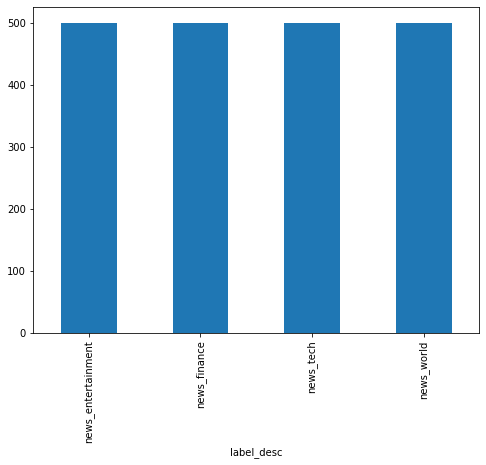

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_500.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_500['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([df_500, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(4400, 4174)

In [ ]:
X_train = features[:2000]
vali_X = features[2000:2400] # altogether 400 posts in validation set
y_train = labels[:2000]
vali_Y = labels[2000:2400]
X_test = features[2400:]
y_test = labels[2400:]
# print(type(X_test))

f1_500 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Grid: {'C': 0.1}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=0.1)
Accuracy Score : 0.6605
Precision Score : 0.6594911502989025
Recall Score : 0.6605
F1 Score : 0.6578262726913757


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
########################### Data Size = all ##################################

news_entertainment    3000
news_finance          3000
news_tech             3000
news_world            3000
Name: label_desc, dtype: int64


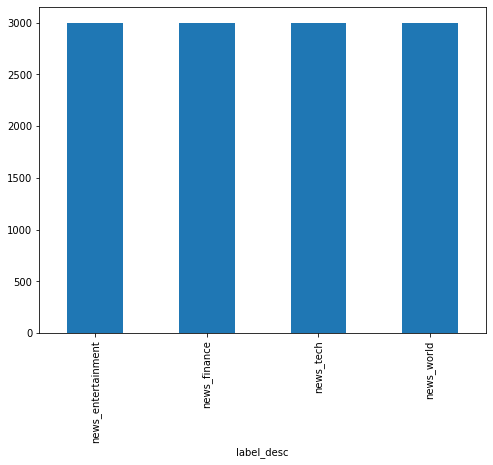

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
whole_training_df.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(whole_training_df['label_desc'].value_counts())
plt.show()

In [ ]:
df_0 = pd.concat([whole_training_df, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(14400, 11221)

In [ ]:
X_train = features[:12000]
vali_X = features[12000:12400] # altogether 400 posts in validation set
y_train = labels[:12000]
vali_Y = labels[12000:12400]
X_test = features[12400:]
y_test = labels[12400:]
# print(type(X_test))

f1_all = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Grid: {'C': 0.1}
####################################
By using SVC model, the evaluation metrics with the best parameter are:
Best parameters: LinearSVC(C=0.1)
Accuracy Score : 0.716
Precision Score : 0.7132982348967056
Recall Score : 0.716
F1 Score : 0.7136421218679445


In [ ]:
print(str(f1_10), "\n",
      str(f1_20), "\n",
      str(f1_30), "\n",
      str(f1_40), "\n",
      str(f1_50), "\n",
      str(f1_60), "\n",
      str(f1_70), "\n",
      str(f1_80), "\n",
      str(f1_90), "\n",
      str(f1_100), "\n",
      str(f1_200), "\n",
      str(f1_300), "\n",
      str(f1_400), "\n",
      str(f1_500), "\n",
      str(f1_all),)

0.3932136078502013 
 0.4605072859043089 
 0.5009999181665004 
 0.5307851381800504 
 0.5484413772103358 
 0.5609997473987277 
 0.5725537822983473 
 0.5704957946140125 
 0.5793864854163273 
 0.5831930780296859 
 0.6192853035814114 
 0.6365541227539423 
 0.6470258555362713 
 0.6578262726913757 
 0.7136421218679445
